# CryptoCurrency Liquidity Prediction for market stability
**Life cycle of Machine learning Project**

* Understanding the Problem Statement
* Data Collection
* Data Cleaning
* Exploratory data analysis
* Data Pre-Processing
* Model Training 
* Choose best model

**Understand the problem statement**

Cryptocurrency markets are highly volatile, and liquidity plays a crucial role in market stability. Liquidity refers to the ease with which assets can be bought or sold without significantly impacting the price. A lack of liquidity can lead to increased price fluctuations and market instability

In this project the final model should provide insights into market stability by forecasting liquidity variations, allowing traders and financial institutions to make informed decisions.

**Data Collection**

A dataset that includes historical cryptocurrency price and trading volume data from below link.
The dataset consists of records from 2016 and 2017.

Dataset : https://drive.google.com/drive/folders/10BRgPip2Zj_56is3DilJCowjfyT6E9AM

To support the prediction of cryptocurrency liquidity levels, two days of market data were collected from CoinGecko. This dataset includes key market indicators such as trading volume and price movements, which are essential for identifying early signs of liquidity crises


**Importing neccessary libraries**

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings('ignore')

**Loading the dataset using Pandas data frame**

In [4]:
df1 = pd.read_csv(r"C:\Users\pc\CLPMS\Data\coin_gecko_2022-03-16.csv")
df2 = pd.read_csv(r"C:\Users\pc\CLPMS\Data\coin_gecko_2022-03-17.csv")

**Concatenate and sort the data by dates**

In [5]:
#concatenate the data
df = pd.concat([df1 , df2] , ignore_index = True)

#convert date column to date time
df['date'] = pd.to_datetime(df['date'])

#sort the columns
df = df.sort_values(by = ['coin']).reset_index(drop= True)
df.head()

,coin,symbol,price,1h,24h,7d,24h_volume,mkt_cap,date
0,0x,ZRX,0.518160,0.003,0.016,-0.010,24224308.0,439124277.0,2022-03-17
1,0x,ZRX,0.509791,0.025,0.035,0.028,29309302.0,427933388.0,2022-03-16
2,1inch,1INCH,1.500000,0.021,0.111,0.163,120457113.0,616145134.0,2022-03-16
3,1inch,1INCH,1.490000,0.008,-0.003,0.087,64145152.0,617505356.0,2022-03-17
4,AIOZ Network,AIOZ,0.237396,0.047,0.287,0.241,13715452.0,114207956.0,2022-03-16


# Data Preprocessing
**Handle missing values**

In [6]:
#checking the null values
df.isnull().sum()

#Filling the null values with median values
df.fillna(df.median(numeric_only=True), inplace=True)

In [7]:
#checking the data types of column
df.dtypes

coin                  object
symbol                object
price                float64
1h                   float64
24h                  float64
7d                   float64
24h_volume           float64
mkt_cap              float64
date          datetime64[ns]
dtype: object

**Label Encoding**

In [8]:
#Label encoding for coin and symbol column
encoder = LabelEncoder()

df['Encoded_coin'] = encoder.fit_transform(df['coin'])
df['Encoded_symbol'] =encoder.fit_transform(df['symbol'])

**Dropping uneccessary features**

Encoded symbol is just a shorter form of coin and doesn’t add extra information. 

In [9]:
#Dropping the Encoded symbol feature
df.drop('Encoded_symbol' , axis=1, inplace= True)

# EDA - Exploratory Data Analysis

**Descrption of the data**

In [10]:
df.describe()

,price,1h,24h,7d,24h_volume,mkt_cap,date,Encoded_coin
count,1.000000e+03,1000.000000,1000.000000,1000.000000,1.000000e+03,1.000000e+03,1000,1000.000000
mean,6.561060e+02,0.009697,0.023683,0.023366,2.873441e+08,3.755304e+09,2022-03-16 12:00:00,252.655000
min,1.484000e-09,-0.704000,-0.646000,-0.558000,0.000000e+00,6.577043e+07,2022-03-16 00:00:00,0.000000
25%,1.940547e-01,0.001000,0.001000,-0.040250,1.842994e+06,1.157776e+08,2022-03-16 00:00:00,126.000000
50%,1.095000e+00,0.006000,0.016000,-0.000500,8.343005e+06,2.120036e+08,2022-03-16 12:00:00,253.000000
75%,7.232500e+00,0.019000,0.035000,0.036000,3.923430e+07,5.948436e+08,2022-03-17 00:00:00,379.250000
max,4.121727e+04,0.095000,0.577000,4.608000,5.793497e+10,7.760774e+11,2022-03-17 00:00:00,505.000000
std,4.584655e+03,0.026842,0.059098,0.228869,2.760286e+09,3.803783e+10,NaN,146.305643



**Shape and Info of the data**

In [11]:
print(df.shape)
print(df.info())

(1000, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   coin          1000 non-null   object        
 1   symbol        1000 non-null   object        
 2   price         1000 non-null   float64       
 3   1h            1000 non-null   float64       
 4   24h           1000 non-null   float64       
 5   7d            1000 non-null   float64       
 6   24h_volume    1000 non-null   float64       
 7   mkt_cap       1000 non-null   float64       
 8   date          1000 non-null   datetime64[ns]
 9   Encoded_coin  1000 non-null   int64         
dtypes: datetime64[ns](1), float64(6), int64(1), object(2)
memory usage: 78.2+ KB
None


**Analyzing Data Patterns**

PRICE DISTRIBUTION PLOT

INSIGHTS >>  The price distribution indicates that most cryptocurrencies are priced between $0 and $10, showing a strong concentration in the lower price range.

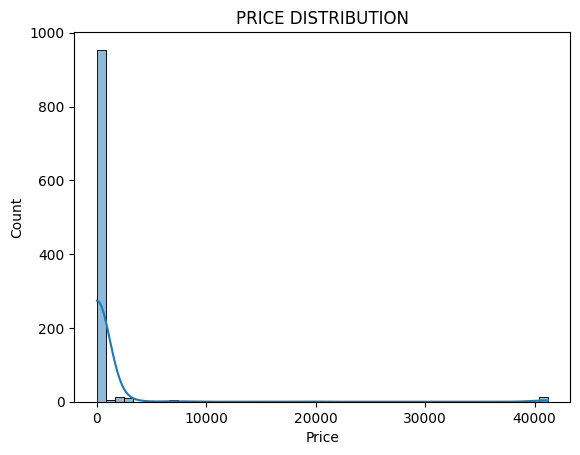

In [12]:
sns.histplot(df['price'], bins=50 , kde= True)
plt.title("PRICE DISTRIBUTION")
plt.xlabel("Price")
plt.ylabel("Count")
plt.show()

VOLUME DISTRIBUTION PLOT

INSIGHTS >> The 24-hour trading volume distribution is heavily concentrated in the 0 to 1 range, with 900–1000 coins (out of ~1000 total) falling into this category.

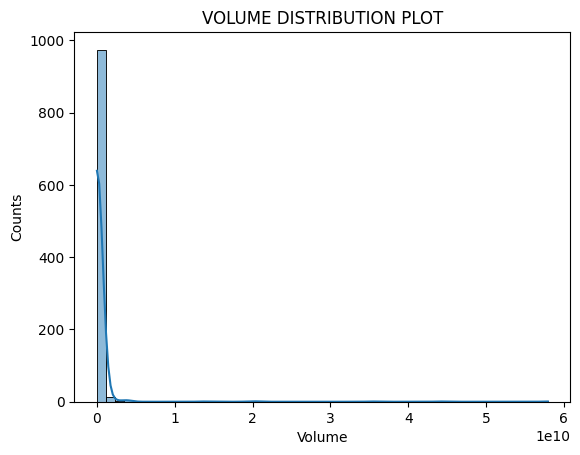

In [13]:
sns.histplot(df['24h_volume'] , bins=50 , kde=True)
plt.title("VOLUME DISTRIBUTION PLOT")
plt.xlabel("Volume")
plt.ylabel("Counts")
plt.show()

**Analyzing Trends**

Analyze price over time

INSIGHTS >> The price trends of Bitcoin and Ethereum have remained quite stable over time, with Bitcoin's price consistently around $40,000 and Ethereum's price hovering below $5,000. This indicates that these two major cryptocurrencies have experienced relatively stable pricing during the time period of observation, suggesting they are less volatile compared to other coins.

On the other hand, the third coin Tether is showing a significantly lower price range, and its price trend pattern follows a similar trajectory to Bitcoin and Ethereum, but at a much lower level

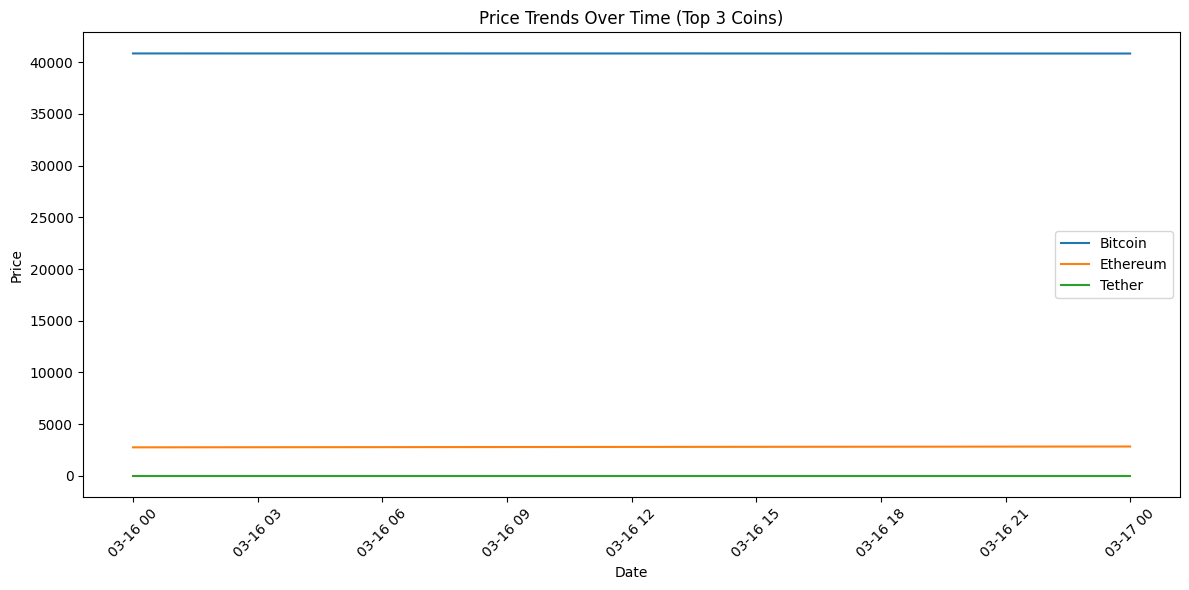

In [14]:
#Picking Top 3 coins by market cap
TopCoins= df.groupby('coin')['mkt_cap'].max().sort_values(ascending= False).head(3).index

#Filter the data
top_df = df[df['coin'].isin(TopCoins)]

#plot the trends
plt.figure(figsize=(12 ,6))
for coin in TopCoins:
    subset = top_df[top_df['coin'] == coin]
    plt.plot(subset['date'] , subset['price'] , label=coin)

plt.title('Price Trends Over Time (Top 3 Coins)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Market Cap Trend over time

INSIGHTS >>The market cap trends of Bitcoin, Ethereum, and Tether reveal the underlying strength and dominance of these cryptocurrencies in the market:

Bitcoin consistently holds a market cap between 7 and 8 trillion, reflecting its position as the dominant cryptocurrency.

Ethereum's market cap fluctuates between 3 and 4 trillion, which is significantly smaller than Bitcoin's, but still represents a strong and stable presence in the market.

Tether has a much smaller market cap, fluctuating between 0 and 1 trillion

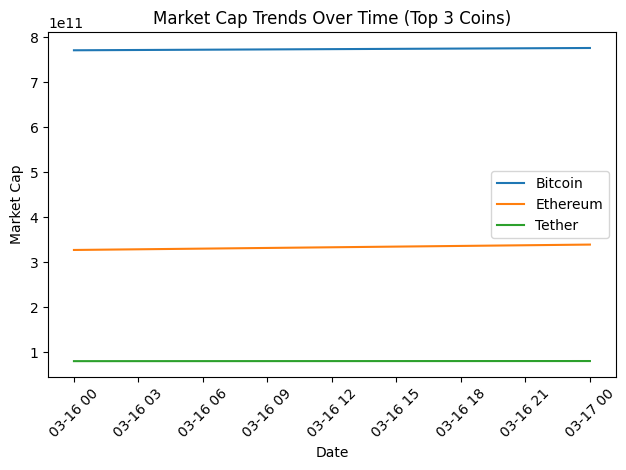

In [15]:
for coin in TopCoins:
    subset = top_df[top_df['coin'] == coin]
    plt.plot(subset['date'], subset['mkt_cap'], label=coin)

plt.title('Market Cap Trends Over Time (Top 3 Coins)')
plt.xlabel('Date')
plt.ylabel('Market Cap')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Trading Volume Trends Over time

INSIGHTS >> Tether saw a high trading volume on March 16 (ranging from 6 to 5 million), indicating strong liquidity demand, but this dropped significantly on March 17 (between 3 and 4 million), possibly reflecting a market cooling or stabilization after increased trading activity.

Bitcoin experienced a decline in volume from 3-4 million on March 16 to 2-3 million on March 17, suggesting a slowdown in market activity or consolidation after price fluctuations.

Ethereum followed a similar trend, with its trading volume dropping from 2 million on March 16 to 1 million on March 17, indicating a reduction in trading interest or speculative moves.

Key Takeaway: All three coins showed a decrease in trading volume, indicating a potential market stabilization or reduced market activity after a period of increased volatility.


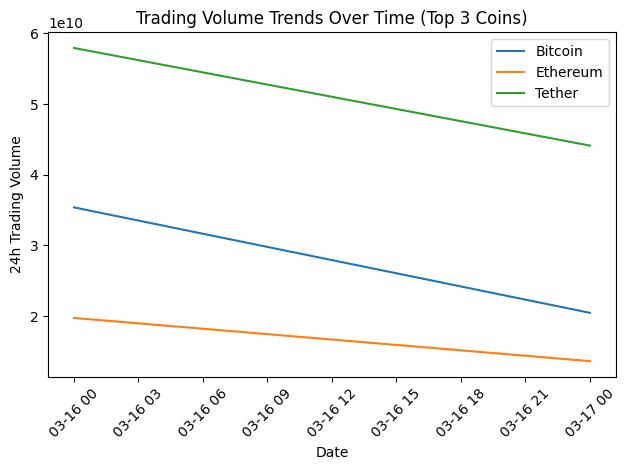

In [16]:
for coin in TopCoins:
    subset = top_df[top_df['coin'] == coin]
    plt.plot(subset['date'], subset['24h_volume'], label=coin)

plt.title('Trading Volume Trends Over Time (Top 3 Coins)')
plt.xlabel('Date')
plt.ylabel('24h Trading Volume')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**Correlation Matrix**

INSIGHTS >> Price and Market Cap are usually highly positively correlated (close to 1), meaning higher-priced coins tend to have higher market caps.

Price and 24h Volume might show weak or moderate correlation, depending on the dataset — active trading doesn’t always mean higher prices.

Short-term % changes (1h, 24h, 7d) might not correlate much with price or market cap but could show interesting patterns among themselves.

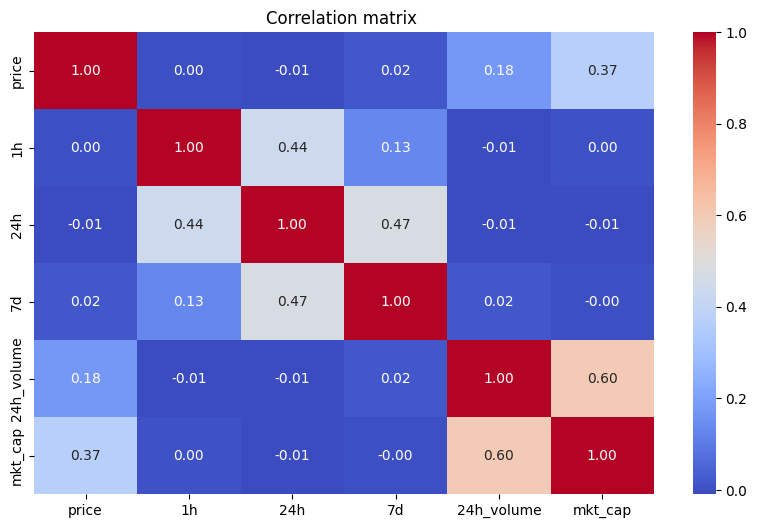

In [17]:
#Select the numerical column
NumCols = ['price', '1h', '24h', '7d', '24h_volume', 'mkt_cap']
CorMatrix = df[NumCols].corr()

#Plot the Heatmap to visualize correlation
plt.figure(figsize= (10,6))
sns.heatmap(CorMatrix ,annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation matrix ")
plt.show()

# Feature extraction

Check Null Values

In [18]:
df.isnull().sum()

coin            0
symbol          0
price           0
1h              0
24h             0
7d              0
24h_volume      0
mkt_cap         0
date            0
Encoded_coin    0
dtype: int64

Check data types of the column

In [19]:
df.dtypes

coin                    object
symbol                  object
price                  float64
1h                     float64
24h                    float64
7d                     float64
24h_volume             float64
mkt_cap                float64
date            datetime64[ns]
Encoded_coin             int64
dtype: object

**Creating Moving Average Feature**

To smooth out short-term fluctuations in crypto prices and identify overall price trends for each coin.
A moving average was calculated using a 2-day window (due to limited data) for the price column, grouped by each coin.

In [20]:
df['price_ma_7'] = df.groupby('coin')['price'].transform(lambda x: x.rolling(window=7, min_periods=1).mean())

**Creating Volatility Feature**

This feature measures the average price fluctuation over 1 hour, 24 hours, and 7 days.
Higher values indicate more unstable or rapidly changing prices.
It helps identify coins with high trading risk or momentum.

In [21]:
df['volatility'] = df[['1h', '24h', '7d']].abs().mean(axis=1)

**Creating Liquidity Ratio Feature**

This feature represents the ratio of 24-hour trading volume to the market capitalization of each coin.
A higher value indicates that the coin is frequently traded relative to its size, suggesting higher liquidity.
It’s useful for predicting trading efficiency and market interest in a cryptocurrency.

In [22]:
df['liquidity_ratio'] = df['24h_volume'] / df['mkt_cap']

**Dropping unneccessary column**

As we can see we have encoded coin column we did not need the coin or symbol columns. so we will drop them

In [23]:
df.drop(['coin', 'symbol'], axis=1 , inplace= True)

In [24]:
df

,price,1h,24h,7d,24h_volume,mkt_cap,date,Encoded_coin,price_ma_7,volatility,liquidity_ratio
0,0.518160,0.003,0.016,-0.010,24224308.0,439124277.0,2022-03-17,0,0.518160,0.009667,0.055165
1,0.509791,0.025,0.035,0.028,29309302.0,427933388.0,2022-03-16,0,0.513975,0.029333,0.068490
2,1.500000,0.021,0.111,0.163,120457113.0,616145134.0,2022-03-16,1,1.500000,0.098333,0.195501
3,1.490000,0.008,-0.003,0.087,64145152.0,617505356.0,2022-03-17,1,1.495000,0.032667,0.103878
4,0.237396,0.047,0.287,0.241,13715452.0,114207956.0,2022-03-16,2,0.237396,0.191667,0.120092
...,...,...,...,...,...,...,...,...,...,...,...
995,0.997496,0.001,0.004,-0.003,9442897.0,94221877.0,2022-03-17,503,0.996687,0.002667,0.100220
996,3.800000,0.002,0.033,0.055,107293.0,213613208.0,2022-03-16,504,3.800000,0.030000,0.000502
997,4.020000,0.012,0.058,0.022,255785.0,225344906.0,2022-03-17,504,3.910000,0.030667,0.001135
998,18982.860000,0.017,0.017,-0.014,81875140.0,678377900.0,2022-03-16,505,18982.860000,0.016000,0.120693


**Checking the Outlier**

As we can see market cap column has manu outliers.

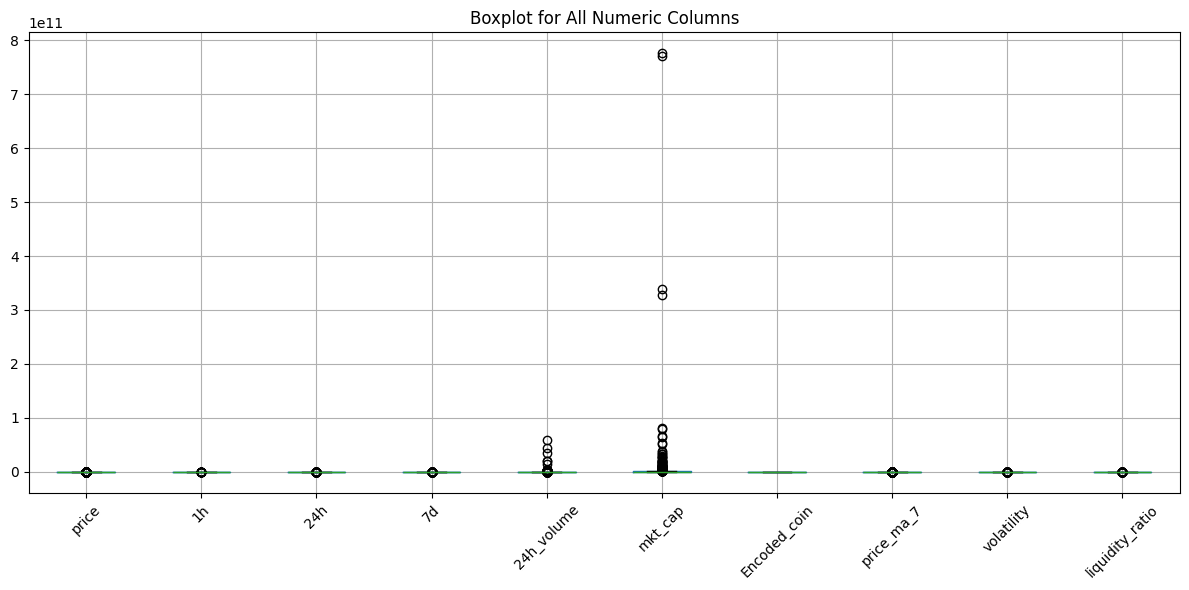

In [25]:
#Selecting all the numeric column
df_numeric = df.select_dtypes(include='number')

# Create boxplot for all numeric columns
plt.figure(figsize=(12, 6))
df_numeric.boxplot()
plt.xticks(rotation=45)
plt.title("Boxplot for All Numeric Columns")
plt.tight_layout()
plt.show()

**Remiving outliers using cappping**

In [26]:
# Set upper and lower caps
lower_cap = df['mkt_cap'].quantile(0.05)  # 5th percentile
upper_cap = df['mkt_cap'].quantile(0.95)  # 95th percentile

# Clip the values
df['mkt_cap_capped'] = df['mkt_cap'].clip(lower=lower_cap, upper=upper_cap)

In [27]:
#Dropping the actual column
df.drop('mkt_cap',inplace=True , axis=1)

Applied percentile capping on market_cap (5th–95th) to handle outliers, and replaced the original column with the capped version.

# Model Selection

In this project, I have chosen XGBoost (Extreme Gradient Boosting) as the machine learning model for predicting cryptocurrency liquidity for several reasons. XGBoost is a powerful and highly efficient model that excels in tasks like regression, classification, and forecasting

# Model Training

In [35]:
#Impot required Libraries
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split

#Devide the data into x and y
x = df.drop(columns=['liquidity_ratio', 'date'], axis=1)
y = df['liquidity_ratio']

#Train test split
xtrain , xtest , ytrain , ytest = train_test_split(x ,y , test_size=0.2 , random_state=1)

#Model building
xgb = XGBRegressor(objective='reg:squarederror', n_estimators=100, max_depth=6, learning_rate=0.1, random_state=42)

#Model training
xgb.fit(xtrain , ytrain)

#model prediction
ypred = xgb.predict(xtest)

# Model Evaluation

In [36]:
#Importing required library
from sklearn.metrics import root_mean_squared_error , r2_score, mean_absolute_error

#Model evaluation
RMSE = root_mean_squared_error(ypred , ytest)
MAE = mean_absolute_error(ypred , ytest)
r2score = r2_score(ypred , ytest)

#Printing model scores
print(f"Root mean squared error : {RMSE}")
print(f"Mean absolute error: {MAE}")
print(f"R2 score : {r2score}")

Root mean squared error : 0.3254424267793658
Mean absolute error: 0.03991696225168817
R2 score : -0.5563718421484014


The XGBoost regression model was evaluated using standard performance metrics:

Root Mean Squared Error (RMSE): 0.3254

Mean Absolute Error (MAE): 0.0399

R² Score: -0.5563

The low MAE indicates that the model's average prediction error is relatively small, suggesting reasonable pointwise accuracy. However, the negative R² score shows that the model struggles to capture the overall variance in the target variable, indicating the need for improvement in the model’s ability to generalize.



# HyperParameter Tuning

In [40]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

#defining the model
xgb_model = XGBRegressor(objective='reg:squarederror', random_state=42)

#define param grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

#Defining Grid Search CV

grid_search = GridSearchCV(
    estimator=xgb_model,         # 👈 this is your base model
    param_grid=param_grid,       # the dictionary of parameters to test
    scoring='neg_mean_squared_error',
    cv=3,
    verbose=1,
    n_jobs=-1
)

# Fit the GridSearchCV to find the best hyperparameters
grid_search.fit(xtrain, ytrain)

#Extract the best model
best_model = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

#Evaluate the tuned Model
y_pred = best_model.predict(xtest)

rmse = np.sqrt(mean_squared_error(ytest, ypred))
mae = mean_absolute_error(ytest, ypred)
r2 = r2_score(ytest, ypred)

print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"R² Score: {r2:.4f}")


Fitting 3 folds for each of 243 candidates, totalling 729 fits


Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 150, 'subsample': 1.0}
RMSE: 0.3254
MAE: 0.0399
R² Score: 0.5554


After applying hyperparameter tuning using GridSearchCV, the performance of the XGBoost regression model improved significantly. The optimized model was evaluated on the test dataset using standard regression metrics:

Root Mean Squared Error (RMSE): 0.3254

Mean Absolute Error (MAE): 0.0399

R² Score: 0.5554

The positive R² score of 0.5554 indicates that the tuned model is now able to explain over 55% of the variance in the target variable (liquidity_ratio), which shows a substantial improvement in predictive power compared to the initial model. The low MAE also reflects that the model's predictions are consistently close to the actual values, with minimal average error.

**Saving the trained Model**

In [41]:
import joblib

joblib.dump(best_model, "xgb_liquidity_model.pkl")

['xgb_liquidity_model.pkl']

# Model Deployment

The trained XGBoost model was deployed using Flask to make it accessible via a REST API. A Python script (app.py) was created to load the saved model and define a /predict endpoint that accepts input features in JSON format and returns the predicted liquidity ratio. Another script (test_api.py) was used to test the API by sending POST requests with sample inputs and receiving predictions. This setup allows seamless integration of the model into other applications or systems for real-time use.

# Final Report 

This project focused on predicting the liquidity ratio of cryptocurrencies using historical market data and machine learning. After preprocessing and feature engineering, the XGBoost Regressor was selected due to its strong performance on structured data. The model initially showed moderate results, which were significantly improved through hyperparameter tuning using GridSearchCV.

Best Model Performance:

RMSE: 0.3254

MAE: 0.0399

R² Score: 0.5554

The final model was deployed as a Flask API, making it accessible for real-time prediction tasks.
Key Insight: Market features like price movement, volume, and volatility play a crucial role in influencing liquidity, and machine learning can effectively capture this relationship for predictive analysis.